**Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('/content/X-Minutal 05.05.2025.xlsx', parse_dates=True)

In [3]:
df.head()

,Device,Date,"Active power, Std. Dev. 10M (kW)",Ambient Temperature Std. Dev. 10M (ºC),Filtered main shaft front bearing temperature value 10M (ºC),Filtered main shaft front bearing temperature value Max. 10M (ºC),Filtered main shaft front bearing temperature value Min. 10M (ºC),Filtered main shaft front bearing temperature value Std. Dev. 10M (ºC),Filtered main shaft rear bearing temperature value 10M (ºC),Filtered main shaft rear bearing temperature value Max. 10M (ºC),...,Trafo 1 winding temperature min 10M (ºC),Trafo 2 winding temperature 10M (ºC),Trafo 2 winding temperature dv 10M (ºC),Trafo 2 winding temperature max 10M (ºC),Trafo 2 winding temperature min 10M (ºC),Trafo 3 winding temperature 10M (ºC),Trafo 3 winding temperature dv 10M (ºC),Trafo 3 winding temperature max 10M (ºC),Trafo 3 winding temperature min 10M (ºC),"WTG nacelle position corrected, Average 10M (°)"
0,SAB-001,2025-05-05 00:00:00,425.3,0.0,34.1,34.1,34.1,0.0,38.6,38.6,...,86.3,114.3,0.6,115.5,113.6,103.1,0.5,104.1,102.6,0
1,SAB-001,2025-05-05 00:10:00,268.9,0.0,34.1,34.1,34.1,0.0,38.7,38.7,...,86.2,113.4,0.2,113.7,113.0,102.6,0.1,102.8,102.4,0
2,SAB-001,2025-05-05 00:20:00,108.7,0.0,34.1,34.1,34.1,0.0,38.7,38.7,...,86.4,113.8,0.2,114.2,113.2,103.3,0.4,103.9,102.5,0
3,SAB-001,2025-05-05 00:30:00,327.8,0.0,34.1,34.1,34.0,0.0,38.8,38.8,...,86.3,113.1,0.4,113.8,112.6,103.1,0.5,103.9,102.4,0
4,SAB-001,2025-05-05 00:40:00,432.3,0.0,34.0,34.1,34.0,0.0,38.9,38.9,...,85.8,112.9,0.2,113.1,112.0,102.6,0.3,102.9,101.8,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16416 entries, 0 to 16415
Columns: 110 entries, Device to WTG nacelle position corrected, Average 10M (°)
dtypes: datetime64[ns](1), float64(106), int64(2), object(1)
memory usage: 13.8+ MB


In [5]:
df.columns

Index(['Device', 'Date', 'Active power, Std. Dev.  10M (kW)',
       'Ambient Temperature Std. Dev. 10M (ºC)',
       'Filtered main shaft front bearing temperature value 10M (ºC)',
       'Filtered main shaft front bearing temperature value Max. 10M (ºC)',
       'Filtered main shaft front bearing temperature value Min. 10M (ºC)',
       'Filtered main shaft front bearing temperature value Std. Dev. 10M (ºC)',
       'Filtered main shaft rear bearing temperature value 10M (ºC)',
       'Filtered main shaft rear bearing temperature value Max. 10M (ºC)',
       ...
       'Trafo 1 winding temperature min 10M (ºC)',
       'Trafo 2 winding temperature 10M (ºC)',
       'Trafo 2 winding temperature dv 10M (ºC)',
       'Trafo 2 winding temperature max 10M (ºC)',
       'Trafo 2 winding temperature min 10M (ºC)',
       'Trafo 3 winding temperature 10M (ºC)',
       'Trafo 3 winding temperature dv 10M (ºC)',
       'Trafo 3 winding temperature max 10M (ºC)',
       'Trafo 3 winding tempera

In [6]:
df.shape

(16416, 110)

In [7]:
df.isnull().sum()

,0
Device,0
Date,0
"Active power, Std. Dev. 10M (kW)",788
Ambient Temperature Std. Dev. 10M (ºC),788
Filtered main shaft front bearing temperature value 10M (ºC),788
...,...
Trafo 3 winding temperature 10M (ºC),788
Trafo 3 winding temperature dv 10M (ºC),788
Trafo 3 winding temperature max 10M (ºC),788
Trafo 3 winding temperature min 10M (ºC),788


In [8]:
df.isnull().sum().sum()

np.int64(83672)

In [9]:
datetime_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower() or 'timestamp' in col.lower()]
if datetime_cols:
    df[datetime_cols[0]] = pd.to_datetime(df[datetime_cols[0]], errors='coerce')
    df.set_index(datetime_cols[0], inplace=True)

df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

df = df.dropna(axis=1, how='all')

df = df.dropna(axis=0, how='any')

/tmp/ipython-input-257650426.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/tmp/ipython-input-257650426.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


In [11]:
df.head(10)

,Device,"Active power, Std. Dev. 10M (kW)",Ambient Temperature Std. Dev. 10M (ºC),Filtered main shaft front bearing temperature value 10M (ºC),Filtered main shaft front bearing temperature value Max. 10M (ºC),Filtered main shaft front bearing temperature value Min. 10M (ºC),Filtered main shaft front bearing temperature value Std. Dev. 10M (ºC),Filtered main shaft rear bearing temperature value 10M (ºC),Filtered main shaft rear bearing temperature value Max. 10M (ºC),Filtered main shaft rear bearing temperature value Min. 10M (ºC),...,Trafo 1 winding temperature min 10M (ºC),Trafo 2 winding temperature 10M (ºC),Trafo 2 winding temperature dv 10M (ºC),Trafo 2 winding temperature max 10M (ºC),Trafo 2 winding temperature min 10M (ºC),Trafo 3 winding temperature 10M (ºC),Trafo 3 winding temperature dv 10M (ºC),Trafo 3 winding temperature max 10M (ºC),Trafo 3 winding temperature min 10M (ºC),"WTG nacelle position corrected, Average 10M (°)"
Date,,,,,,,,,,,,,,,,,,,,,
2025-05-05 00:00:00,SAB-001,425.3,0.0,34.1,34.1,34.1,0.0,38.6,38.6,38.6,...,86.3,114.3,0.6,115.5,113.6,103.1,0.5,104.1,102.6,0
2025-05-05 00:10:00,SAB-001,268.9,0.0,34.1,34.1,34.1,0.0,38.7,38.7,38.6,...,86.2,113.4,0.2,113.7,113.0,102.6,0.1,102.8,102.4,0
2025-05-05 00:20:00,SAB-001,108.7,0.0,34.1,34.1,34.1,0.0,38.7,38.7,38.7,...,86.4,113.8,0.2,114.2,113.2,103.3,0.4,103.9,102.5,0
2025-05-05 00:30:00,SAB-001,327.8,0.0,34.1,34.1,34.0,0.0,38.8,38.8,38.7,...,86.3,113.1,0.4,113.8,112.6,103.1,0.5,103.9,102.4,0
2025-05-05 00:40:00,SAB-001,432.3,0.0,34.0,34.1,34.0,0.0,38.9,38.9,38.8,...,85.8,112.9,0.2,113.1,112.0,102.6,0.3,102.9,101.8,0
2025-05-05 00:50:00,SAB-001,289.4,0.0,34.0,34.0,34.0,0.0,38.9,38.9,38.8,...,82.5,109.8,1.1,112.0,108.2,99.9,1.0,101.8,98.2,0
2025-05-05 01:00:00,SAB-001,348.7,0.0,34.0,34.0,34.0,0.0,38.9,38.9,38.8,...,81.0,106.6,0.6,108.1,106.1,96.9,0.5,98.2,96.6,0
2025-05-05 01:10:00,SAB-001,100.7,0.0,34.0,34.0,34.0,0.0,38.9,38.9,38.9,...,81.2,107.0,0.7,108.2,106.1,97.6,0.7,98.6,96.6,0
2025-05-05 01:20:00,SAB-001,246.8,0.0,34.0,34.0,34.0,0.0,39.0,39.0,38.9,...,83.0,108.6,0.2,109.0,108.2,99.3,0.4,99.8,98.6,0


In [12]:
df.isnull().sum()

,0
Device,0
"Active power, Std. Dev. 10M (kW)",0
Ambient Temperature Std. Dev. 10M (ºC),0
Filtered main shaft front bearing temperature value 10M (ºC),0
Filtered main shaft front bearing temperature value Max. 10M (ºC),0
...,...
Trafo 3 winding temperature 10M (ºC),0
Trafo 3 winding temperature dv 10M (ºC),0
Trafo 3 winding temperature max 10M (ºC),0
Trafo 3 winding temperature min 10M (ºC),0


**Feature Engineering**

In [13]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month

In [14]:
numeric_cols = ['Average Active Power 10M (kW)', 'Average Wind Speed 10M (m/s)', 'Ambient Temperature Std. Dev. 10M (ºC)']
for col in numeric_cols:
    df[f'{col}_lag1'] = df[col].shift(1)
    df[f'{col}_lag2'] = df[col].shift(2)

In [15]:
window = 3
for col in numeric_cols:
    df[f'{col}_rollmean'] = df[col].rolling(window=window).mean()
    df[f'{col}_rollstd'] = df[col].rolling(window=window).std()

In [16]:
for col in numeric_cols:
    df[f'{col}_diff'] = df[col].diff()

In [17]:
df = df.dropna()

**IsolationForest Model**

In [18]:
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

In [19]:
features = [col for col in df.columns if col not in ['Device']]

X_train = train_df[features]
X_test = test_df[features]

In [20]:
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

In [21]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [22]:
train_df['anomaly'] = y_train_pred
test_df['anomaly'] = y_test_pred

/tmp/ipython-input-2397622301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['anomaly'] = y_train_pred
/tmp/ipython-input-2397622301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['anomaly'] = y_test_pred


In [23]:
print(test_df[test_df['anomaly'] == -1])

                      Device  Active power, Std. Dev.  10M (kW)  \
Date                                                              
2025-05-05 22:10:00  SAB-092                              573.2   
2025-05-05 00:00:00  SAB-093                                0.3   
2025-05-05 00:10:00  SAB-093                                0.2   
2025-05-05 00:20:00  SAB-093                                0.3   
2025-05-05 00:40:00  SAB-093                                0.3   
...                      ...                                ...   
2025-05-05 22:10:00  SAB-114                              840.4   
2025-05-05 23:20:00  SAB-114                               91.9   
2025-05-05 23:30:00  SAB-114                               91.9   
2025-05-05 23:40:00  SAB-114                               91.9   
2025-05-05 23:50:00  SAB-114                               91.9   

                     Ambient Temperature Std. Dev. 10M (ºC)  \
Date                                                          
20

In [24]:
test_df.to_csv('anomaly_detection_results.csv')

**Plotting the Anomalies**

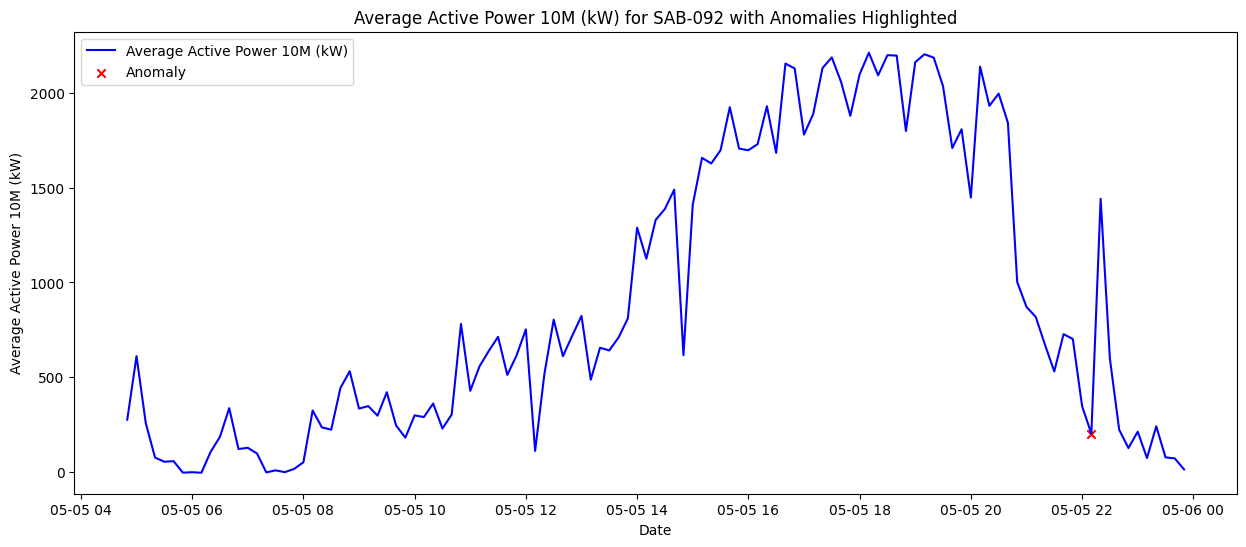

In [25]:
df = pd.read_csv('anomaly_detection_results.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

example_device = df['Device'].unique()[0]
df_device = df[df['Device'] == example_device]

feature = 'Average Active Power 10M (kW)'

plt.figure(figsize=(15, 6))
plt.plot(df_device.index, df_device[feature], label=feature, color='blue')
anomalies = df_device[df_device['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies[feature], color='red', label='Anomaly', marker='x')
plt.title(f"{feature} for {example_device} with Anomalies Highlighted")
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.show()

In [26]:
total_anomalies = (df['anomaly'] == -1).sum()
print("Total anomalies detected:", total_anomalies)

Total anomalies detected: 348


In [27]:
total_anomalies = df[df['anomaly'] == -1].shape[0]
print("Total anomalies detected:", total_anomalies)

Total anomalies detected: 348


In [28]:
total_anomalies = df[df['anomaly'] == -1].shape[0]
print("Total anomalies detected:", total_anomalies)

Total anomalies detected: 348


**Plotting the All Detected Anomalies**

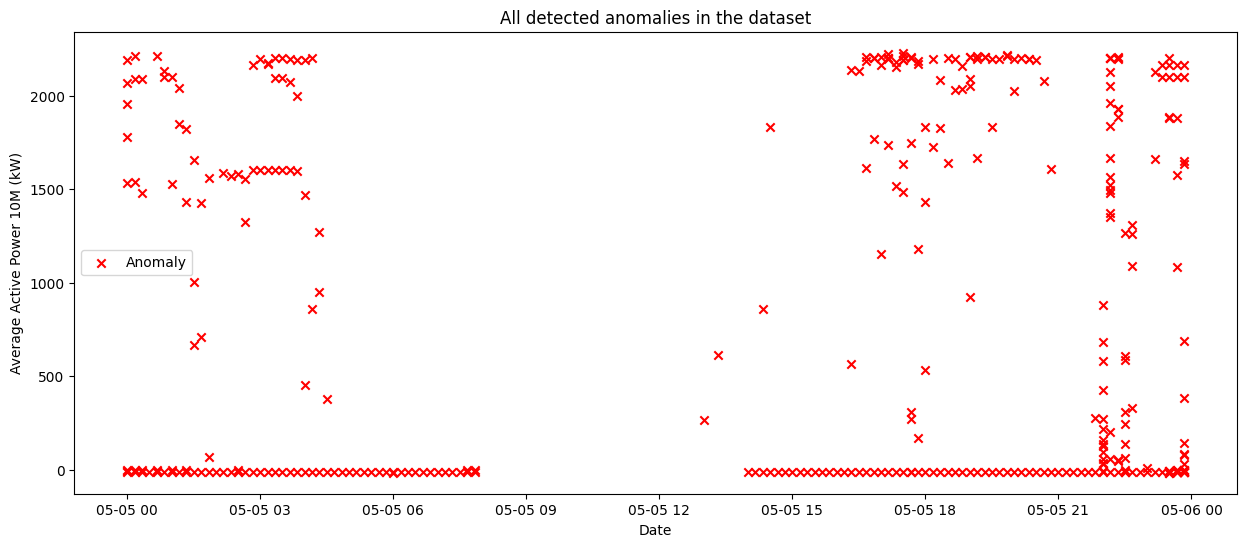

In [29]:
anomalies = df[df['anomaly'] == -1]
plt.figure(figsize=(15, 6))
plt.scatter(anomalies.index, anomalies[feature], color='red', label='Anomaly', marker='x')
plt.title('All detected anomalies in the dataset')
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.show()

In [30]:
anomalies = df[df['anomaly'] == -1]
anomalies.to_csv('all_detected_anomalies.csv')

print(anomalies['Device'].value_counts())

Device
SAB-111    108
SAB-105     51
SAB-095     40
SAB-093     24
SAB-104     23
SAB-114     19
SAB-100     10
SAB-113     10
SAB-107      8
SAB-106      8
SAB-103      7
SAB-096      5
SAB-112      5
SAB-097      5
SAB-102      4
SAB-110      4
SAB-108      3
SAB-094      3
SAB-098      3
SAB-101      3
SAB-099      2
SAB-109      2
SAB-092      1
Name: count, dtype: int64


In [31]:
print(anomalies.describe())

       Active power, Std. Dev.  10M (kW)  \
count                         348.000000   
mean                          145.614080   
std                           240.749534   
min                             0.200000   
25%                             2.500000   
50%                            10.850000   
75%                           192.925000   
max                          1052.500000   

       Ambient Temperature Std. Dev. 10M (ºC)  \
count                               348.00000   
mean                                  0.42500   
std                                   0.42937   
min                                   0.00000   
25%                                   0.10000   
50%                                   0.40000   
75%                                   0.60000   
max                                   2.30000   

       Filtered main shaft front bearing temperature value 10M (ºC)  \
count                                         348.000000              
mean               

**Plot of Top Detected Anomaly Device**

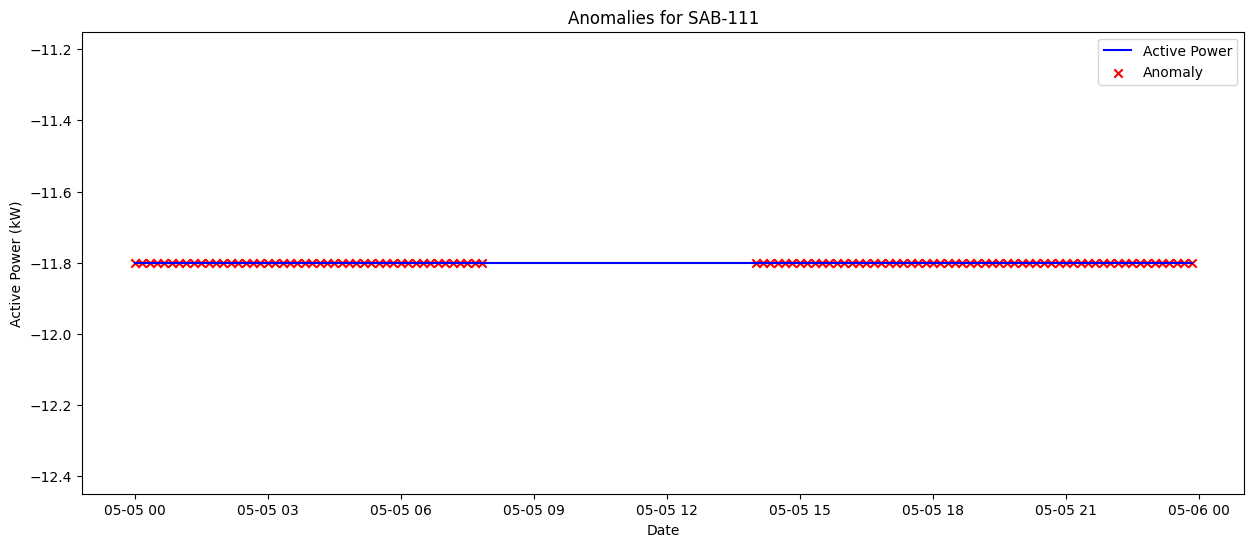

In [32]:
device = 'SAB-111'
df_device = anomalies[anomalies['Device'] == device]
plt.figure(figsize=(15, 6))
plt.plot(df[df['Device'] == device].index, df[df['Device'] == device]['Average Active Power 10M (kW)'], label='Active Power', color='blue')
plt.scatter(df_device.index, df_device['Average Active Power 10M (kW)'], color='red', label='Anomaly', marker='x')
plt.title(f"Anomalies for {device}")
plt.xlabel('Date')
plt.ylabel('Active Power (kW)')
plt.legend()
plt.show()

In [33]:
anomalies.to_csv('all_detected_anomalies.csv')

**SVM and LocalOutlierFactor**

In [34]:
features = [col for col in df.columns if col not in ['Device']]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1, novelty=True)
lof.fit(X_scaled)
df['lof_anomaly'] = lof.predict(X_scaled)

In [36]:
svm = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')
svm.fit(X_scaled)
df['svm_anomaly'] = svm.predict(X_scaled)

In [37]:
print((df['lof_anomaly'] == -1).sum(), "LOF anomalies")
print((df['svm_anomaly'] == -1).sum(), "SVM anomalies")

297 LOF anomalies
335 SVM anomalies


**LSTM**

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

In [39]:
feature = 'Average Active Power 10M (kW)'
X_vals = df[[feature]].values
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_vals)

In [40]:
lookback = 10
def create_sequences(data, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        Y.append(data[i+lookback])
    return np.array(X), np.array(Y)

X_seq, y_seq = create_sequences(X_norm, lookback)

In [42]:
lstm_model = Sequential([
    LSTM(64, input_shape=(lookback, 1), return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_seq, y_seq, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0696
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0317
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0252
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0245
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0247
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0214
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0201
Epoch 9/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233
Epoch 10/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0238


In [43]:
lstm_preds = lstm_model.predict(X_seq)
lstm_mse = np.mean((lstm_preds - y_seq) ** 2, axis=1)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [44]:
threshold = np.percentile(lstm_mse, 99)
anomaly_flags = (lstm_mse > threshold)

In [45]:
print(f"LSTM detected {anomaly_flags.sum()} anomalies")

LSTM detected 33 anomalies


**GRU**

In [46]:
gru_model = Sequential([
    GRU(64, input_shape=(lookback, 1), return_sequences=False),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_seq, y_seq, epochs=10, batch_size=32)

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0829
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0277
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0212
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0216
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0218
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0212
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0206
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0209
Epoch 9/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0208
Epoch 10/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0199


In [48]:
gru_preds = gru_model.predict(X_seq)
gru_mse = np.mean((gru_preds - y_seq) ** 2, axis=1)

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [49]:
threshold = np.percentile(gru_mse, 99)
anomaly_flags = (gru_mse > threshold)

In [50]:
print(f"GRU detected {anomaly_flags.sum()} anomalies")

GRU detected 33 anomalies


# **Summary Report**

Anomaly detection was performed on the wind turbine time series dataset using five different models: Isolation Forest, Local Outlier Factor (LOF), One-Class SVM, LSTM, and GRU.

The number of anomalies detected by each model is as follows:

| Model                |   Number of Anomalies |
|:---------------------|----------------------:|
| Isolation Forest     |                   348 |
| One-Class SVM        |                   335 |
| Local Outlier Factor |                   297 |
| LSTM                 |                    33 |
| GRU                  |                    33 |


Traditional ML models (Isolation Forest, LOF, SVM) detected many anomalies, finding both mild and strong outliers, while deep learning models (LSTM, GRU) flagged only the rarest, most extreme cases. Points identified as anomalies by both methods are most likely true faults or rare events. Visual inspection and root cause analysis of flagged points are recommended to confirm if issues are genuine or due to data quality.